In [41]:
#load the dataset:
import pandas as pd
import tensorflow as tf
import keras
df=pd.read_csv('data.csv') 

In [42]:
print(df.head()) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [43]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [44]:
#preprocessing the dataset
from sklearn.preprocessing import StandardScaler 
# Split the data into input and output variables 
X=df.drop('MEDV',axis=1) 
Y=df['MEDV'] 


In [45]:
# Scale the input features 
scaler = StandardScaler() 
scaler.fit_transform(X) 
print(X[:5]) 

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  


In [46]:
#Split the dataset 
from sklearn.model_selection import train_test_split 
#Split the data into training and testing sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)    

In [47]:
#Print the shapes of the training and testing sets 
print('Training set shape:', X_train.shape, Y_train.shape) 
print('Testing set shape:', X_test.shape, Y_test.shape) 

Training set shape: (354, 13) (354,)
Testing set shape: (152, 13) (152,)


In [48]:
#: Define the model architecture 
from keras.models import Sequential 
from keras.layers import Dense, Dropout 


In [49]:
model =Sequential() 
model.add(Dense(64,input_dim=13,activation='relu'))  
model.add(Dropout(0.2)) 
model.add(Dense(32,activation='relu')) 
model.add(Dense(1)) 

In [50]:
# Display 	the 	model 	summary 
print(model.summary()) 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                896       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [56]:
# Compile the model 
from keras.losses import MeanSquaredError
model.compile(loss=MeanSquaredError(), optimizer='adam', metrics=['mean_absolute_error']) 

In [60]:
#Train the model 
from keras.callbacks import EarlyStopping 


In [61]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5) 

In [62]:

history = model.fit(X_train, Y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping]) 

Epoch 1/100
9/9 [==============================] - 0s 29ms/step - loss: 426.5981 - mean_absolute_error: 18.2794 - val_loss: 389.5282 - val_mean_absolute_error: 17.8849
Epoch 2/100
9/9 [==============================] - 0s 14ms/step - loss: 422.9983 - mean_absolute_error: 18.1799 - val_loss: 385.9483 - val_mean_absolute_error: 17.7846
Epoch 3/100
9/9 [==============================] - 0s 13ms/step - loss: 419.3287 - mean_absolute_error: 18.0795 - val_loss: 382.3798 - val_mean_absolute_error: 17.6840
Epoch 4/100
9/9 [==============================] - 0s 12ms/step - loss: 415.6708 - mean_absolute_error: 17.9794 - val_loss: 378.7936 - val_mean_absolute_error: 17.5823
Epoch 5/100
9/9 [==============================] - 0s 15ms/step - loss: 412.0344 - mean_absolute_error: 17.8771 - val_loss: 375.1565 - val_mean_absolute_error: 17.4785
Epoch 6/100
9/9 [==============================] - 0s 12ms/step - loss: 408.2989 - mean_absolute_error: 17.7741 - val_loss: 371.5348 - val_mean_absolute_error: 

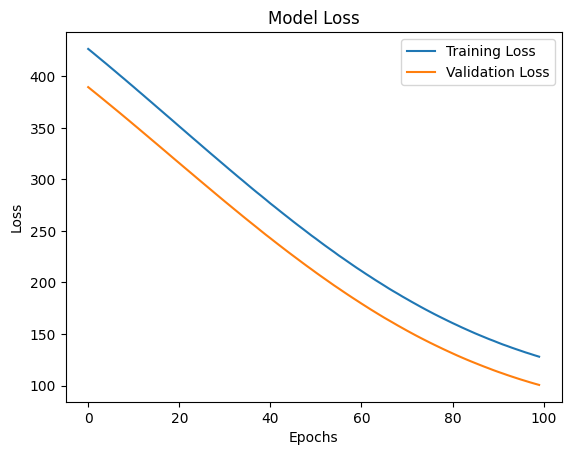

In [69]:
# Plot the training and validation loss over epochs
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



In [70]:
# Evaluate the model on the testing set loss, 
mae = model.evaluate (X_test, Y_test) 
# Print the mean absolute error 
print('Mean Absolute Error:', mae)    

5/5 [==============================] - 0s 4ms/step - loss: 92.3649 - mean_absolute_error: 6.5983
Mean Absolute Error: [92.3648910522461, 6.5982770919799805]
